# Posterior Approximation for a Binomial model for Graph

We can express a binomial model dedicated to graphs as an exponential model :

$$P(y | n \theta) = exp[\theta_1 t_{none\_edge}(y) + \theta_2 t_{edge}(y) ] $$

Where $y$ is a **graph realisation (an observation)**
* $t[y] = [t_{none\_edge}(y), t_{edge}(y)]$ the vector of sufficient statistics: $t_{none\_edge}(y) = none\_edge\_count(y), t_{edge}(y) = edge\_count(y)$

And then express the posterior distribution of $\theta$ for a Binomial model:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[\theta_1 t_{none\_edge}(y) + \theta_2 t_{edge}(y) ] P(\theta)$$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf

from math import exp

In [3]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    theta = [d[1] for d in data]
    data_frame = pd.DataFrame({'theta2': theta})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'theta2': [theta[1] for theta in data2['theta2'].items() if theta[0] % 10 == 0]})
    return data_frame

def summary(data):
    print("========== Q1 ==========")
    q_25 = np.percentile(data['theta2'], 25)
    print("Q1 for p parameter {}".format(q_25))
    print("========== Median ==========")
    q_50 = np.percentile(data['theta2'], 50)
    print("Median for p parameter {}".format(q_50))
    avg = np.mean(data['theta2'])
    print("========== Mean ==========")
    print("Mean for p parameter {}".format(avg))
    q_75 = np.percentile(data['theta2'], 75)
    print("========== Q3 ==========")
    print("Q3 for p parameter {}".format(q_75))
    
def plot_marginals(data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    fig, axs = plt.subplots(1, 2, figsize=(14,9))
    
    # ABC
    
    # Sample theta parameter
    theta_abc = data_abc['theta2'].tolist()[burn_in::by]
    
    # Distribution
    sns.distplot(theta_abc, axlabel="theta_edge distribution ABC", ax=axs[0])
    
    # Path
    axs[1].plot(range(len(theta_abc)),theta_abc)
    axs[1].set(xlabel='iterations', ylabel='theta_edge parameter ABC')

def autocor(data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    col_names = data_abc.columns.values
    param_name = col_names[0]
    fig, axs = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(21, 10)) 
    params = data_abc[param_name].tolist()[burn_in::by]
    
    plot_acf(params, ax=axs)
    axs.set_title("Autocorrelation for {} parameter".format(param_name))
    

### Experimentation #1
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 10]$ ($\theta_1$ is fixed)
* $y \sim Bernouilli\_graph\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.05,0.05]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [4]:
FILE_NAME_1 = 'assets/exp1.json'

In [5]:
data1 = extract_from_file(FILE_NAME_1)

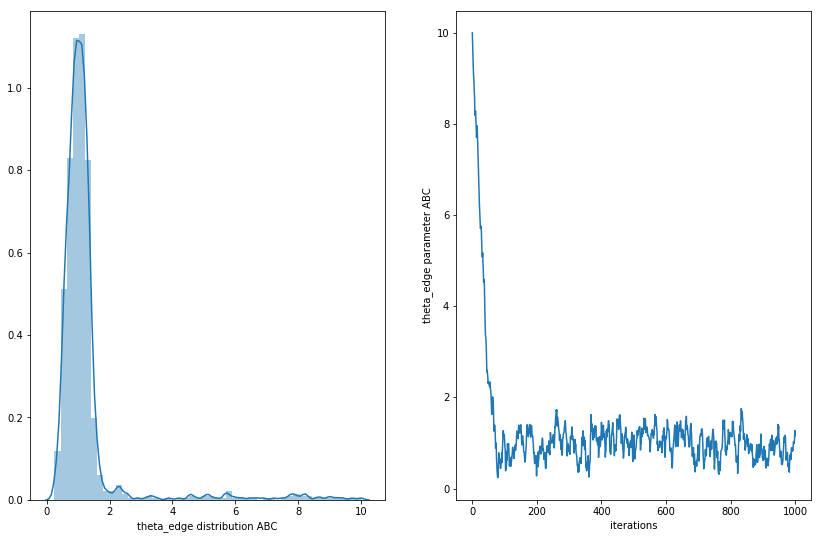

In [6]:
plot_marginals(data1)


### Experimentation #2
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 10]$ ($\theta_1$ is fixed)
* $y \sim Metropolis\_hasting\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.05,0.05]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [7]:
FILE_NAME_2 = 'assets/exp2.json'

In [8]:
data2 = extract_from_file(FILE_NAME_2)

In [9]:
summary(data2)

========== Q1 ==========
Q1 for p parameter 0.7418988384854176
========== Median ==========
Median for p parameter 0.972792488590135
========== Mean ==========
Mean for p parameter 1.157288994519456
========== Q3 ==========
Q3 for p parameter 1.2200723825648725


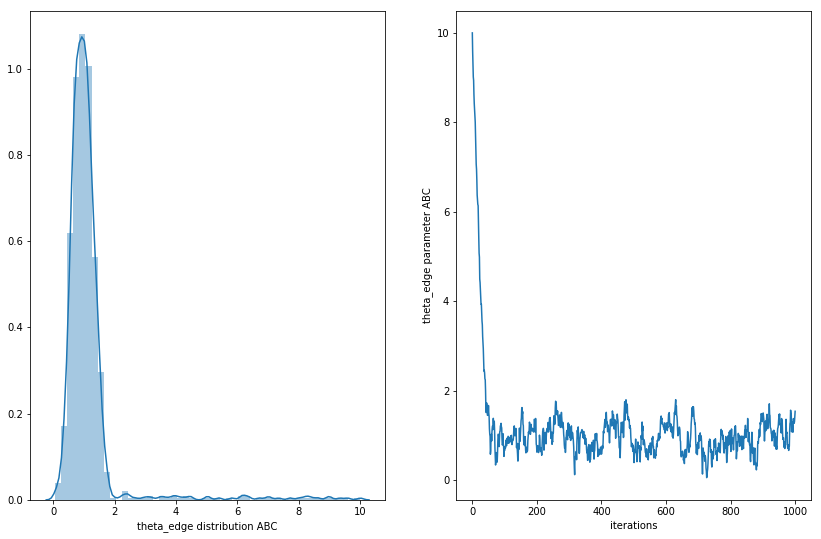

In [10]:
plot_marginals(data2)
plt.savefig('post_bino_marginals.png', dpi=300, transparent=True)

### Experimentation #3
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 20]$ ($\theta_1$ is fixed)
* $y \sim Metropolis\_hasting\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.1, 0.1]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

In [35]:
FILE_NAME_3 = './assets/exp3.json'
data3 = extract_from_file(FILE_NAME_3)

In [36]:
summary(data3)

========== Q1 ==========
Q1 for p parameter 5.088977346127209
========== Median ==========
Median for p parameter 6.1779225538513725
========== Mean ==========
Mean for p parameter 6.7205118174389
========== Q3 ==========
Q3 for p parameter 7.676975281473583


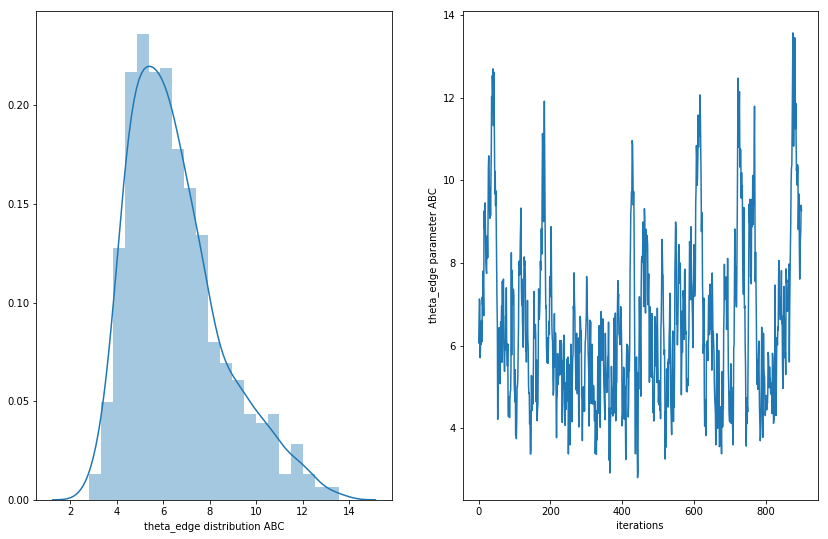

In [37]:
plot_marginals(data3, burn_in=1000, by=10)

### Experimentation #4
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 20]$ ($\theta_1$ is fixed)
* $y \sim Metropolis\_hasting\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.05, 0.05]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

In [38]:
FILE_NAME_4 = './assets/exp4.json'
data4 = extract_from_file(FILE_NAME_4)

In [39]:
summary(data4)

========== Q1 ==========
Q1 for p parameter 5.148534296066644
========== Median ==========
Median for p parameter 6.47945352456591
========== Mean ==========
Mean for p parameter 7.855153252110643
========== Q3 ==========
Q3 for p parameter 9.935158592098793


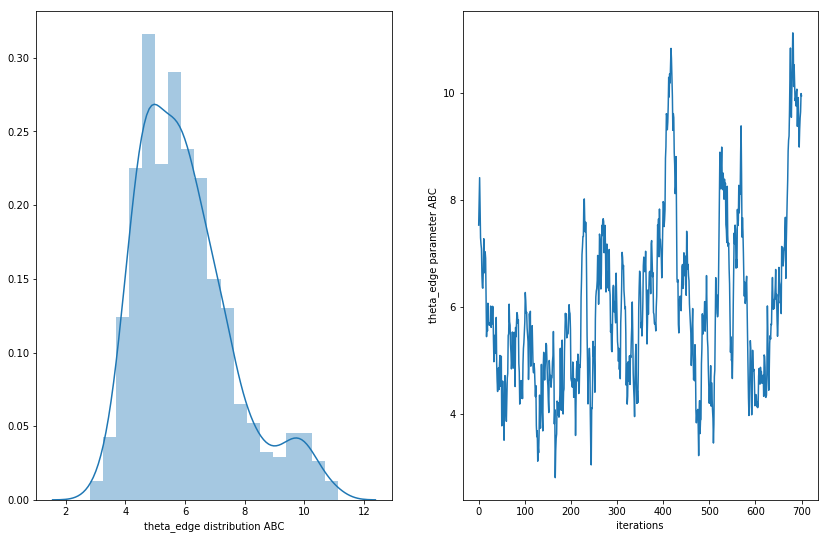

In [40]:
plot_marginals(data4, burn_in=3000, by=10)

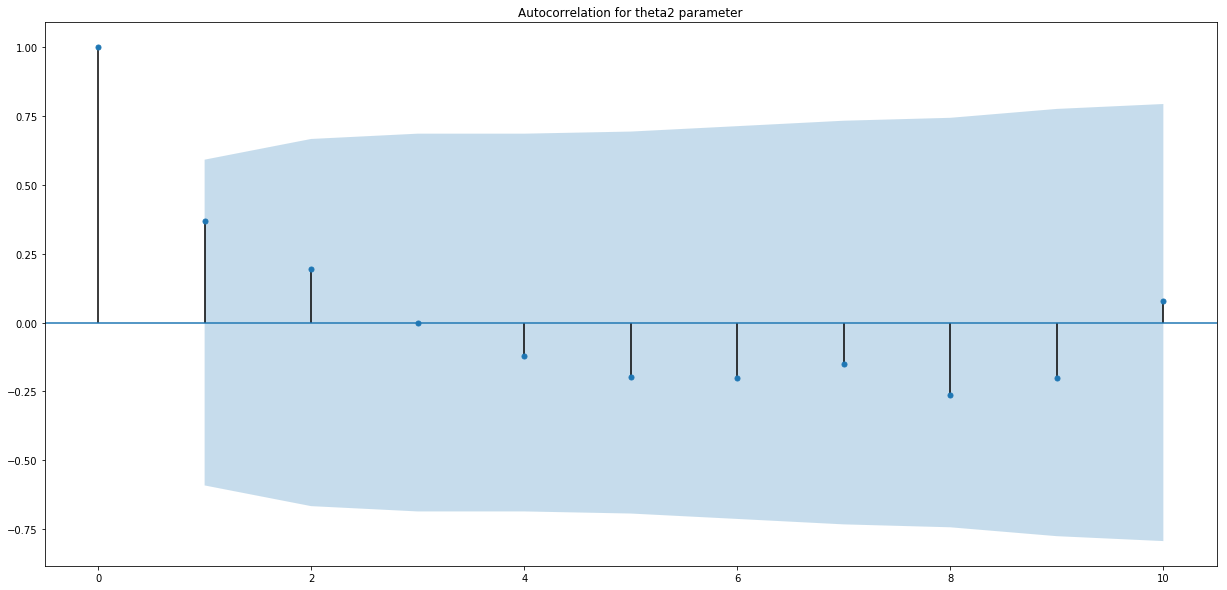

In [46]:
autocor(data4, by=1000)

### Experimentation #5
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [1, 20]$ ($\theta_1$ is fixed)
* $y \sim Metropolis\_hasting\_sampler(\theta_1 = 1, \theta_2 = 1, iter=100)$
* $\Delta=[0.05, 0.05]$
* Number of samples: $n=100000$
* Shadow chain length: $n_{shadow} = 100$

In [42]:
FILE_NAME_5 = './assets/exp5.json'
data5 = extract_from_file(FILE_NAME_5)

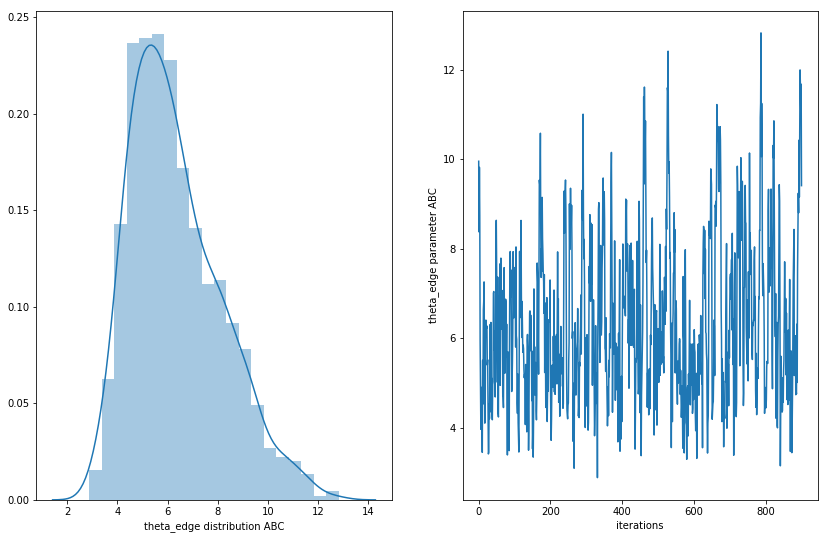

In [49]:
plot_marginals(data5, burn_in=10000, by=100)

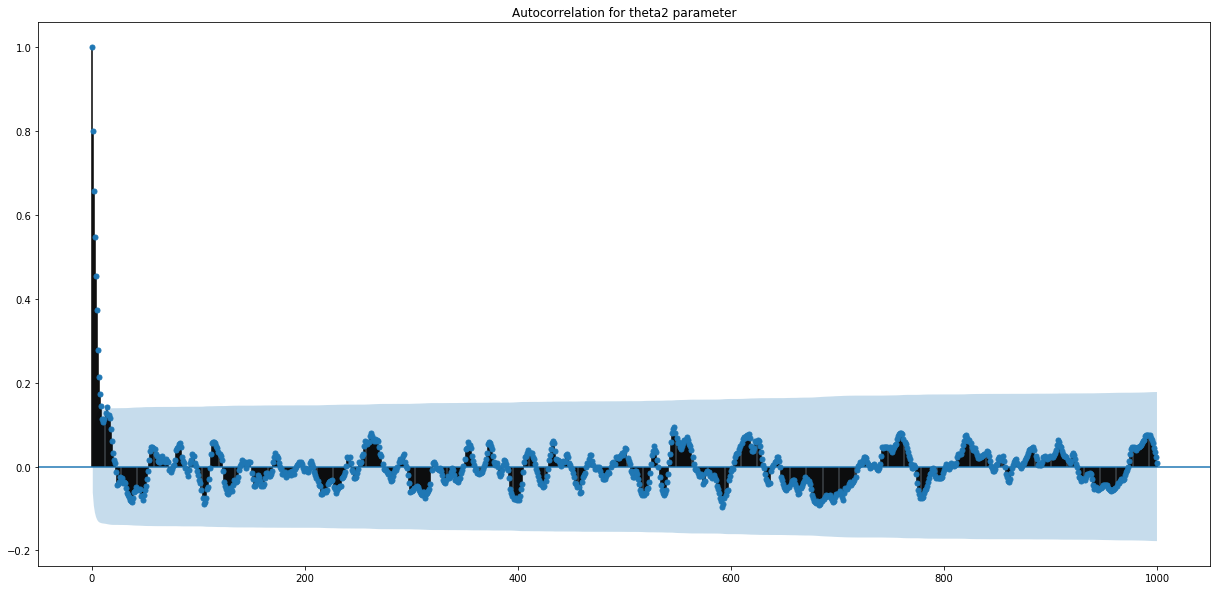

In [48]:
autocor(data5, by=100)